In [1]:
import cv2
import os
import numpy as np
import imutils
import glob
from matplotlib import pyplot as plt



In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
l1=load_images_from_folder("C:\\Users\\SREEPADA\\Desktop\\Project/Dataset/10")


In [4]:
l2=load_images_from_folder("C:\\Users\\SREEPADA\\Desktop\\Project/Dataset/50")
l3=load_images_from_folder("C:\\Users\\SREEPADA\\Desktop\\Project/Dataset/100")
l4=load_images_from_folder("C:\\Users\\SREEPADA\\Desktop\\Project/Dataset/200")
l5=load_images_from_folder("C:\\Users\\SREEPADA\\Desktop\\Project/Dataset/500")

In [71]:
#for i in l1:
#show_rgb(i)

In [5]:
def show_rgb(image):
    eq_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(eq_image)
    plt.show()

In [90]:
y1=[0 for i in range(len(l1))]
y2=[1 for i in range(len(l2))]
y3=[2 for i in range(len(l3))]
y4=[3 for i in range(len(l4))]
y5=[4 for i in range(len(l5))]

In [91]:
print(len(y1))
print(len(y2))
print(len(y3))
print(len(y4))
print(len(y5))

16
20
21
22
20


In [92]:
y=y1+y2+y3+y4+y5
len(y)

99

In [75]:
images=l1+l2+l3+l4+l5
for i in range(len(images)):
    images[i]=
len(images)

99

In [76]:
moments=[]
histogram=[]
for i in images:
    moments.append(fd_hu_moments(i))
    histogram.append(fd_histogram(i))

In [58]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
 
def fd_histogram(image, mask=None):
    bins=16
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()

In [80]:
from sklearn.preprocessing import MinMaxScaler
global_features = np.hstack([moments])
scaler = MinMaxScaler(feature_range=(0, 1))
#Normalize The feature vectors...
rescaled_features = scaler.fit_transform(global_features)

In [81]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(global_features, y, test_size=0.2)

In [83]:
len(y_train)

79

In [85]:
from sklearn.svm import SVC
model=svm.SVC()

In [86]:
model.fit(X_train,y_train)

C:\Users\SREEPADA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
pred=model.predict(X_test)

In [89]:
for i in X_test:
    

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

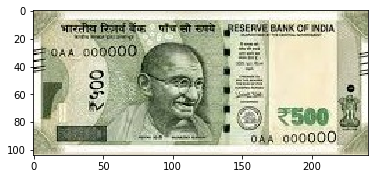

In [27]:
template1 = cv2.imread('C:\\Users\\SREEPADA\\Desktop\\template5.jpg')
show_rgb(template1)

In [23]:
def coordinates(image,template):
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    template = cv2.Canny(template, 50, 200)
    (tH, tW) = template.shape[:2]
    #plt.imshow(template)
    
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    found = None

    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])

        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        clone = np.dstack([edged, edged, edged])
        cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
        (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
        #plt.imshow(clone)
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

        (_, maxLoc, r) = found
        (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
        (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    plt.imshow(image)
    r=[startX,startY,endX,endY]
    imCrop = image[int(r[1]):int(r[3]), int(r[0]):int(r[2])]
    return imCrop
    #plt.imshow(imCrop)

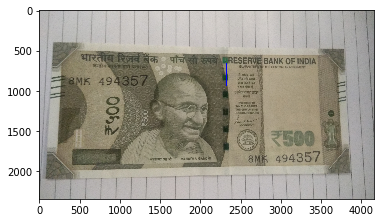

In [28]:
croped_images=[]
for image in l1:
    croped_images.append(coordinates(image,template1))

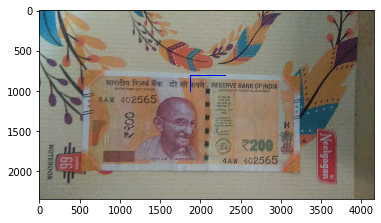

In [43]:
croped_images=[]
for image in l4:
    croped_images.append(coordinates(image,template1))

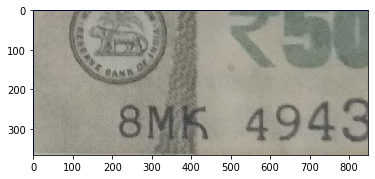

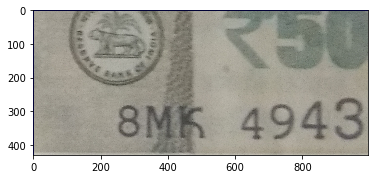

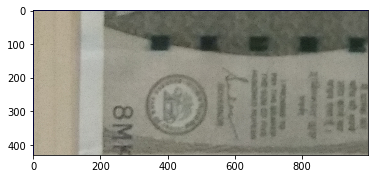

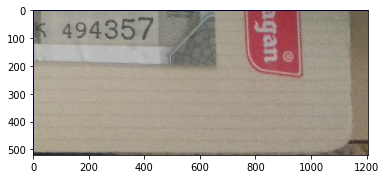

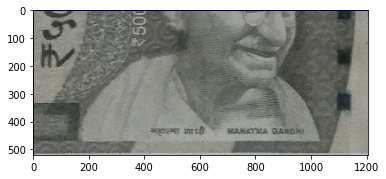

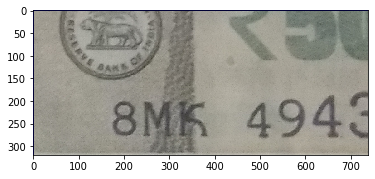

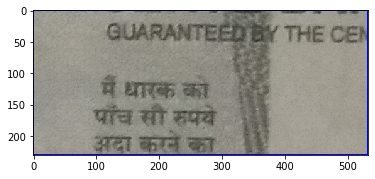

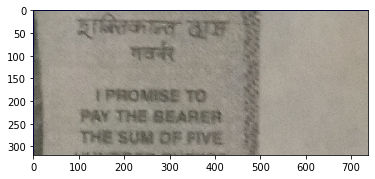

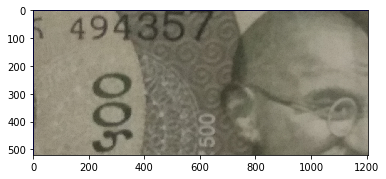

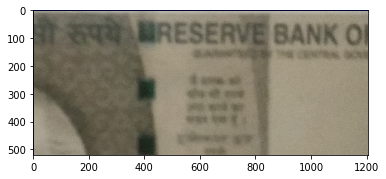

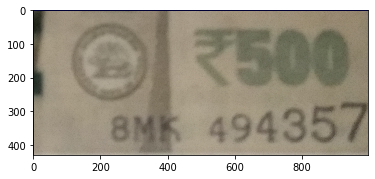

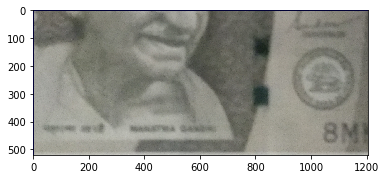

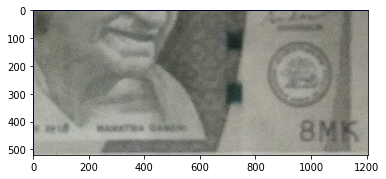

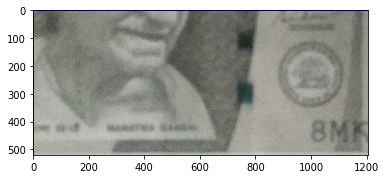

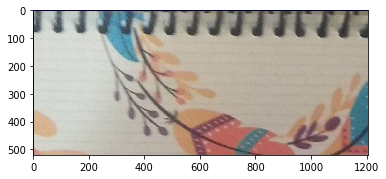

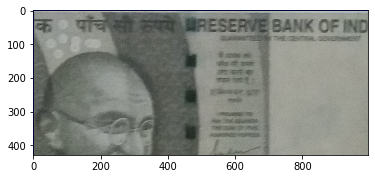

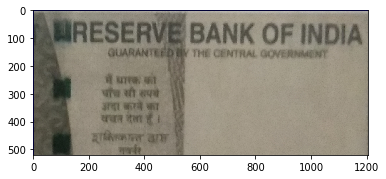

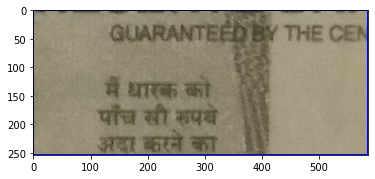

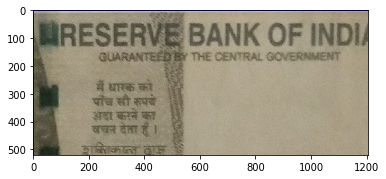

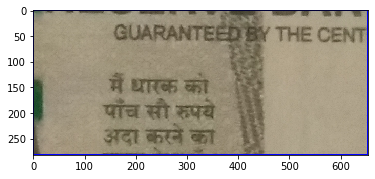

In [29]:
for i in croped_images:
    plt.imshow(i)
    plt.show()